In [ ]:
#задача предсказания чисел (линейной регрессии) 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test_simple_reg.csv to test_simple_reg.csv
Saving train_simple_reg.csv to train_simple_reg.csv


In [3]:
#Загружаем и исследуем датафреймы

In [5]:
test = pd.read_csv("test_simple_reg.csv")
train = pd.read_csv("train_simple_reg.csv")

In [7]:
print(train.head())
print(train.columns.values)
print(train.dtypes)
print(train.isna().sum())
print(test.isna().sum())

   Unnamed: 0         0         1  ...         8         9    Predict
0           0 -0.019734 -2.293412  ...  3.691985 -3.158359   5.778825
1           1  0.807845 -0.755991  ... -0.601803  0.123827  -3.011382
2           3  1.490152  3.544350  ... -1.293841  1.994930 -13.235602
3           4 -1.309911 -2.506019  ...  0.828209  2.080548   0.236855
4           5  0.786761  0.881352  ... -0.411956 -0.681040  -5.260961

[5 rows x 12 columns]
['Unnamed: 0' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'Predict']
Unnamed: 0      int64
0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
Predict       float64
dtype: object
Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
Predict       0
dtype: int64
Unnamed: 

In [11]:
#распределяем данные 
X = train.drop(["Unnamed: 0", "Predict"], axis=1)
y = train["Predict"]

test.pop('Unnamed: 0')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [16]:
# линейная регрессия, тк 
from sklearn.linear_model import  LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
LR_pred = LR.predict(test)

print(LR.score(X_test, y_test))

srav = pd.DataFrame({'real': y_test, 'pred': y_pred}) 
srav


1.0


,real,pred
701,-11.657701,-11.657701
261,-7.704008,-7.704008
510,2.062456,2.062456
90,-7.280895,-7.280895
604,-10.192346,-10.192346
...,...,...
789,-5.090634,-5.090634
353,-4.247676,-4.247676
810,-10.024406,-10.024406
76,3.666157,3.666157


Визуализация данных


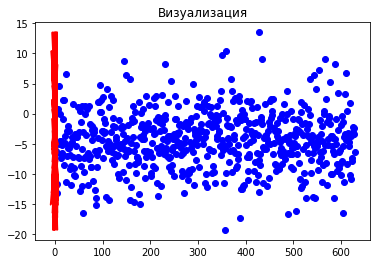

In [29]:
xm = np.arange(0,len(X_train),1)

plt.scatter(xm, y_train, color='blue') # plotting the observation line
plt.plot(X_train, LR.predict(X_train), color='red') # plotting the regression line
 
plt.title("Визуализация") 
plt.show() 

#график вызвал проблемы, ибо даже с теорией не могу понять отношения нужных величин, и что мы должны передавать 

In [ ]:
#линейная регрессия с градиентным спуском

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

StandardScaler().fit(train) 
scaled_train = StandardScaler().transform(train)
scaled_test = StandardScaler().transform(test)

SGDR = SGDRegressor(tol=.0001, eta0=.01) 
SGDR.fit(scaled_train, target)
SGDR_pred = SGDR.predict(scaled_test)
mse = mean_squared_error(target, predictions) 

print("RMSE: {}".format(np.sqrt(mse)))


#увы, в теории разобраться не смог, так что только LR

In [33]:
#загрузка ответов 

res = pd.DataFrame({'index': [i for i in range(len(LR_pred))],'Predict': LR_pred})
res.to_csv('simpreg_Baklanov.csv', index=False)
files.download("simpreg_Baklanov.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>